## Comparing Support Vector Classifier with Linear and RBF Kernel in Python

Support Vector Classifier(SVC) merupakan salah satu algoritma machine learning yang dapat digunakan untuk analisis klasifikasi. Dalam Python, SVC masuk ke dalam package scikit learn atau sklearn dan masuk ke dalam modul Support Vector Machine(SVM). Saat saya membaca modul SVC dalam link https://scikit-learn.org/stable/modules/svm.html, saya menemukan terdapat beberapa kernel yang dapat digunakan di algoritma SVC ini. Berikut adalah gambar perbedaan tampilan pengklasifikasian pada kernel yang ada.

![Getting Started](sphx_glr_plot_iris_svc_001.png)

Berdasarkan gambar di atas, saya melihat SVC dapat menggunakan 3 kernel yaitu linear, RBF, dan polynomial. Maka dari itu, saya ingin mencoba membandingkan performa klasifikasi dari 2 kernel yang ada. Disini saya ingin menmbandingkan linear dan RBF kernel.

### *Data*

Untuk melakukan percobaan ini, saya mencari dataset klasifikasi di https://www.kaggle.com/ dan akhirnya menemukan dataset berjudul 'Mobile Price Classification' yang dapat diakses melalui link berikut https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import title
from turtle import color

In [2]:
train_data=pd.read_csv('train.csv',sep=',')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### *Data Information*
* battery_power: Energi total yang dapat disimpan baterai dalam satu waktu diukur dalam mAh
* blue: Memiliki bluetooth atau tidak
* clock_speed : kecepatan mikroprosesor mengeksekusi instruksi
* dual_sim : Memiliki dukungan dual sim atau tidak
* fc : Kamera Depan mega piksel
* four_g : Memiliki 4G atau tidak
* int_memory : Memori Internal dalam Gigabytes
* m_deep : Kedalaman Seluler dalam cm
* mobile_wt : Berat ponsel
* n_cores : Jumlah inti prosesor
* pc: Kamera Utama mega piksel
* px_height : Tinggi Resolusi Piksel
* px_width : Lebar Resolusi Piksel
* ram: Memori Akses Acak dalam Mega Bytes
* sc_h : Tinggi Layar ponsel dalam cm
* sc_w : Lebar Layar ponsel dalam cm
* talk_time : waktu terlama untuk satu kali pengisian daya baterai saat Anda berada
* three_g : Memiliki 3G atau tidak
* touch_screen: Memiliki layar sentuh atau tidak
* wifi: Memiliki wifi atau tidak
* price_range : Ini adalah variabel target dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) dan 3 (biaya sangat tinggi).

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [99]:
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Melalui output di atas, terlihat bahwa tidak terdapat missing value pada dataset training yang akan digunakan

In [4]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### *Data Exploration*

<AxesSubplot:title={'center':'Label plot'}>

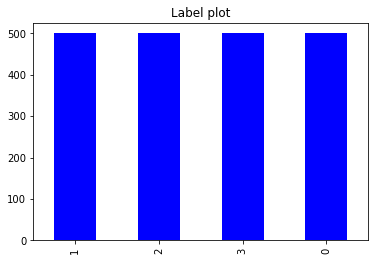

In [5]:
#label plot
train_data['price_range'].value_counts().plot(kind='bar',color='blue',title='Label plot')

Berdasarkan barchart di atas, data train yang digunakan merupakan data yang seimbang karena tiap kelasnya memiliki jumlah yang hampir sama

In [100]:
X=train_data.iloc[:,:-1]
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


Untuk mendapatkan eksplorasi data seperti gambar perbandingan kernel di awal, saya melakukan reduksi dimensi pada data menggunakan PCA dengan menjadikan 2 komponen utama yang nantinya dijadikan sumbu-x dan sumbu-y visualisasi data label

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

In [9]:
fit_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df=pd.concat([pca_df,train_data[['price_range']]],axis=1)
pca_df.head()

,PCA_1,PCA_2,price_range
0,430.597094,-795.788231,1
1,504.984735,696.622368,2
2,473.329828,763.942136,2
3,639.822324,779.691180,2
4,-718.985184,382.304525,1


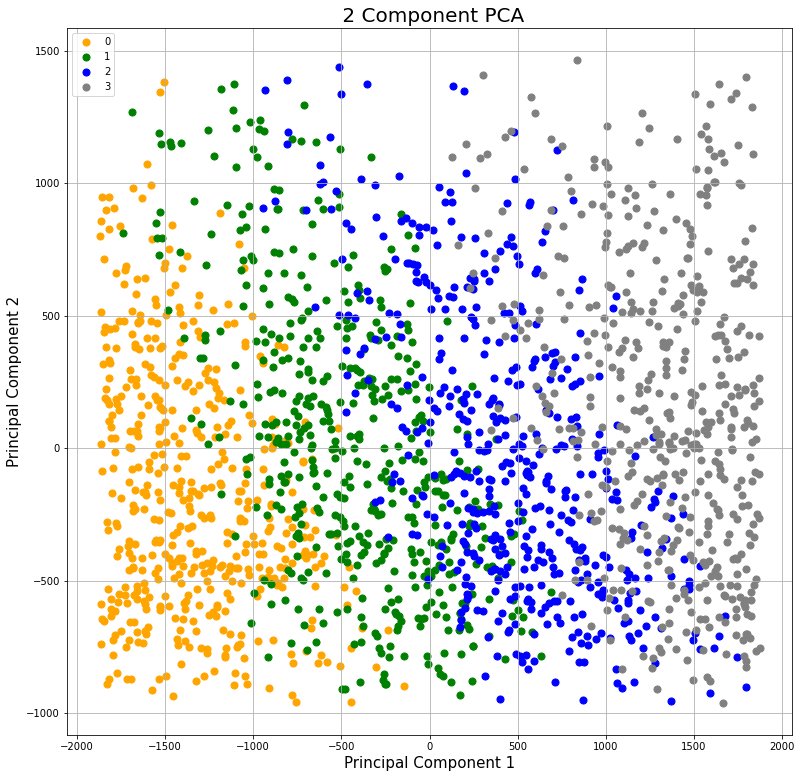

In [10]:
fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' 2 Component PCA', fontsize = 20)

targets = [0, 1, 2,3]
colors = ['orange', 'green', 'blue','grey']
for target, color in zip(targets,colors):
    indicesToKeep = train_data['price_range'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'PCA_1']
             ,pca_df.loc[indicesToKeep, 'PCA_2']
             ,c = color
             , s = 50)
ax.legend(targets)
ax.grid()

Gambar di atas menunjukan bahwa label terbagi dengan area yang cukup jelas antar kelasnya dan masih sangat mungkin untuk diklasifikasi secara linear.

### *Modelling Data*

In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

In [12]:
X=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]

In [13]:
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


Setelah melihat data yang memiliki range yang tidak sama, perlu dilakukan normalisasi data supaya data menjadi memiliki range yang sama dan membuat proses pembetukan model menjadi lebih representatif pada data. Normalisasi yang digunakan yaitu MinMaxScaler yang nantinya membuat semua variabel independen memiliki range dari 0 hingga 1 saja.

In [59]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_norm.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


Selanjutnya untuk membentuk model yang melakukan validasi pada model yang sudah dibuat, data perlu dibagi menjadi data train dan data validation yang memiliki rasio 80:20. Ini dilakukan agar model yang sudah dibentuk dapat dilihat performanya sudah baik atau belum.

In [101]:
Xn_train,Xn_val,yn_train,yn_val=train_test_split(X_norm,y,test_size=0.2,random_state=17)
print('Shape train X :',Xn_train.shape)
print('Shape validation X :',Xn_val.shape)
print('Shape train y :',yn_train.shape)
print('Shape validation y :',yn_val.shape)

Shape train X : (1600, 20)
Shape validation X : (400, 20)
Shape train y : (1600,)
Shape validation y : (400,)


In [102]:
mod_svm_ln=svm.SVC(kernel='linear')
mod_svm_rn=svm.SVC(kernel='rbf')
mod_svm_ln.fit(Xn_train,yn_train)
mod_svm_rn.fit(Xn_train,yn_train)

SVC()

In [103]:
ytr_pred_sln=mod_svm_ln.predict(Xn_train)
ytr_pred_srn=mod_svm_rn.predict(Xn_train)

In [104]:
yts_pred_sln=mod_svm_ln.predict(Xn_val)
yts_pred_srn=mod_svm_rn.predict(Xn_val)

In [105]:
print(classification_report(yn_train, ytr_pred_sln))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       396
           1       0.95      0.95      0.95       404
           2       0.96      0.93      0.95       401
           3       0.96      0.98      0.97       399

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [106]:
print(classification_report(yn_train, ytr_pred_srn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       396
           1       0.95      0.97      0.96       404
           2       0.95      0.96      0.95       401
           3       0.99      0.96      0.97       399

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [112]:
print(classification_report(yn_val, yts_pred_sln))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       104
           1       0.88      0.96      0.92        96
           2       0.97      0.91      0.94        99
           3       0.95      0.98      0.97       101

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [113]:
print(classification_report(yn_val, yts_pred_srn))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       104
           1       0.79      0.83      0.81        96
           2       0.83      0.78      0.80        99
           3       0.90      0.93      0.92       101

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



In [132]:
score_l=cross_validate(mod_svm_ln,X_norm,y,scoring='accuracy',cv=5,return_train_score=True)
score_l

{'fit_time': array([0.05878878, 0.04640102, 0.04265857, 0.04206991, 0.0394237 ]),
 'score_time': array([0.0096674 , 0.00929427, 0.00907111, 0.00999784, 0.01000047]),
 'test_score': array([0.9425, 0.935 , 0.9525, 0.945 , 0.94  ]),
 'train_score': array([0.9525  , 0.965   , 0.95875 , 0.96125 , 0.955625])}

In [133]:
print('Linear Kernel Train Accuracy =',round(score_l['train_score'].mean(),2))
print('Linear Kernel Test Accuracy =',round(score_l['test_score'].mean(),2))

Linear Kernel Train Accuracy = 0.96
Linear Kernel Test Accuracy = 0.94


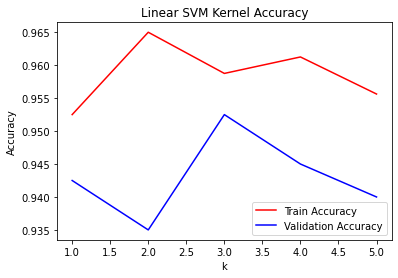

In [134]:
k=range(1,6)
plt.plot(k,score_l['train_score'],'r',label='Train Accuracy')
plt.plot(k,score_l['test_score'],'b',label='Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Linear SVM Kernel Accuracy')
plt.legend()
plt.show()

In [116]:
score_r=cross_validate(mod_svm_rn,X_norm,y,scoring='accuracy',cv=5,return_train_score=True)
score_r

{'fit_time': array([0.18608022, 0.09964418, 0.14243007, 0.10301566, 0.09857011]),
 'score_time': array([0.04699516, 0.04590082, 0.05239058, 0.06090808, 0.04896688]),
 'test_score': array([0.865, 0.835, 0.9  , 0.84 , 0.845]),
 'train_score': array([0.97125 , 0.975625, 0.969375, 0.973125, 0.97125 ])}

In [135]:
print('RBF Kernel Train Accuracy =',round(score_r['train_score'].mean(),2))
print('RBF Kernel Test Accuracy =',round(score_r['test_score'].mean(),2))

RBF Kernel Train Accuracy = 0.97
RBF Kernel Test Accuracy = 0.86


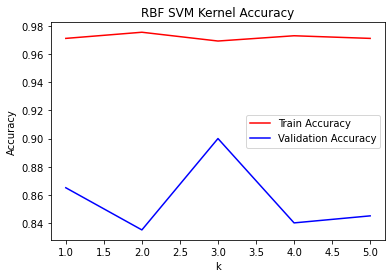

In [117]:
k=range(1,6)
plt.plot(k,score_r['train_score'],'r',label='Train Accuracy')
plt.plot(k,score_r['test_score'],'b',label='Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('RBF SVM Kernel Accuracy')
plt.legend()
plt.show()

#### *Kesimpulan*

Jika melihat hasil akurasi dari kedua metode, saya menyimpulkan kernel linear lebih baik karena memiliki akurasi yang sama tingginya di data train maupun validation. Kernel RBF kurang baik karena memiliki nilai akurasi yang sangat tinggi pada train sedangkan pada validation memiliki gap yang cukup besar. Kondisi ini mengindikasikan adanya overfitting pada kernel RBF. Oleh karena itu, disimpulkan model yang lebih baik dalam memprediksi range harga mobile adalah kernel linear.

### *Feature Importance*

In [118]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize = (13,13))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

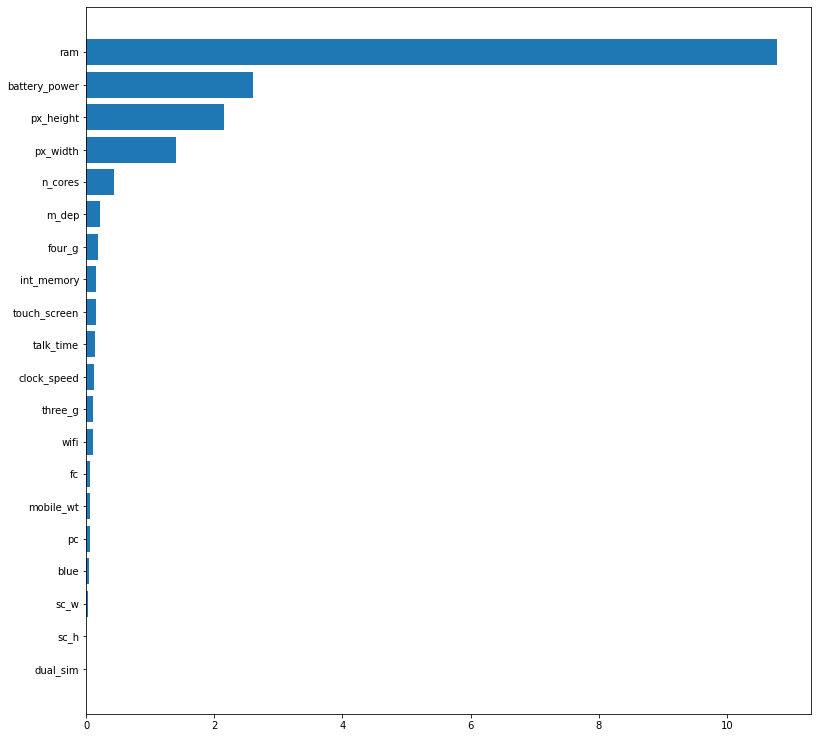

In [119]:
features_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
f_importances(abs(mod_svm_ln.coef_[0]), features_names)

### *Using Data Test*

In [120]:
test_data=pd.read_csv('test.csv',sep=',')
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [121]:
X_test=test_data.iloc[:,1:]
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [122]:
Xt_norm=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
Xt_norm

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.362057,1.0,0.52,1.0,0.736842,0.0,0.048387,0.000000,0.941667,0.285714,0.80,0.115306,0.608812,0.860502,0.500000,0.388889,0.000000,0.0,1.0,0.0
1,0.227121,1.0,0.00,1.0,0.210526,1.0,0.951613,0.777778,0.925000,0.571429,0.60,0.380612,0.238318,0.972475,0.071429,0.000000,0.277778,1.0,0.0,0.0
2,0.872411,1.0,0.92,0.0,0.052632,0.0,0.403226,0.888889,0.883333,0.285714,0.20,0.647959,0.578104,0.571887,0.857143,0.555556,0.444444,0.0,1.0,1.0
3,0.698063,0.0,0.00,1.0,0.947368,1.0,0.370968,0.444444,0.133333,1.000000,1.00,0.150510,0.835781,0.971940,0.357143,0.000000,0.277778,1.0,1.0,0.0
4,0.623246,0.0,0.36,0.0,0.578947,1.0,0.758065,0.444444,0.233333,0.714286,0.90,0.382143,0.206943,0.405398,0.714286,0.444444,0.277778,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800935,1.0,0.56,0.0,0.000000,1.0,0.838710,0.444444,0.750000,0.857143,0.85,0.328571,0.275701,0.498397,0.642857,0.444444,0.722222,1.0,1.0,0.0
996,0.072144,0.0,0.52,1.0,0.000000,0.0,0.177419,0.888889,0.883333,0.428571,0.10,0.587755,0.755674,0.448156,0.214286,0.055556,0.944444,0.0,1.0,1.0
997,0.456914,0.0,0.36,0.0,0.052632,1.0,0.096774,0.444444,0.000000,0.000000,0.60,0.243367,0.216956,0.258418,0.000000,0.000000,0.666667,1.0,0.0,0.0
998,0.689379,1.0,0.00,1.0,0.000000,0.0,0.774194,0.333333,0.758333,0.142857,0.60,0.019388,0.221629,0.602084,0.714286,0.611111,0.222222,0.0,1.0,0.0


In [123]:
yt_pred=mod_svm_ln.predict(Xt_norm)
yt_pred=pd.DataFrame([test_data['id'],yt_pred]).T
yt_pred.columns=['id','Prediction']
yt_pred

,id,Prediction
0,1,2
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2


<AxesSubplot:>

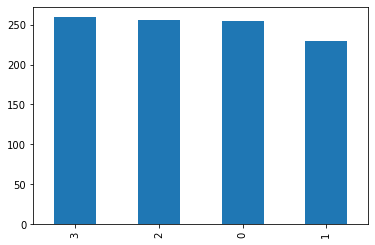

In [124]:
yt_pred['Prediction'].value_counts().plot(kind='bar')